In [1]:
import os
import torch
import warnings
warnings.filterwarnings('ignore')

import GCAST
os.environ["R_HOME"] = "/public/home/ljquan/anaconda3/envs/myx/lib/R"
random_seed = 2025
device = "cuda" if torch.cuda.is_available() else "cpu"
packnames = ('mclust',)


# os.chdir(r"C:\Users\24112\Desktop\item\test")
# print("loading path...", os.getcwd())


The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


## Extract embedding for Cross-region integration of v10x Mouse Anterior and Mouse Posterior 

In [2]:
data_root = "../Dataset/v10x"
sample_name =[
    "Mouse_Brain_Anterior",
    "Mouse_Brain_Posterior",
]
n_clusters=25
negi = 12 

In [5]:
GCAST.set_seed(random_seed)
adata, graph_dict = GCAST.Load10xST(data_root, sample_name, n_clusters,negi= negi, n_top_genes = 6000, mode="batch", label=False).data()
net = GCAST.GCAST(adata.obsm["X_pca"], graph_dict, device=device, model_name=f"AP")
net.train_with_dec()



 26%|██▌       | 258/1000 [01:00<02:54,  4.24it/s]


In [6]:
net.load_model()
feat, _, _ = net.eval_model()
adata.obsm["emb"] = feat


In [15]:
adata = GCAST.hm_integration(adata, harmony_key='emb' )

2025-10-23 14:16:07,300 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-10-23 14:16:13,303 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-10-23 14:16:13,345 - harmonypy - INFO - Iteration 1 of 10
2025-10-23 14:16:14,327 - harmonypy - INFO - Iteration 2 of 10
2025-10-23 14:16:15,275 - harmonypy - INFO - Iteration 3 of 10
2025-10-23 14:16:16,193 - harmonypy - INFO - Converged after 3 iterations


In [16]:
GCAST.KMeans_Cluster(adata, n_clusters=n_clusters)
GCAST.evaluate_cluster(adata,mode=1,  method_name="KMeans")

KMeans SC:0.3135978488500166 DB:1.1923473574627212


## Align the spatial position coordinates of Mouse Anterior and Mouse Posterior for visualization

In [26]:
import anndata 
adata_processed = anndata.read_h5ad("../Tutorial/adata_crossregion.h5ad")

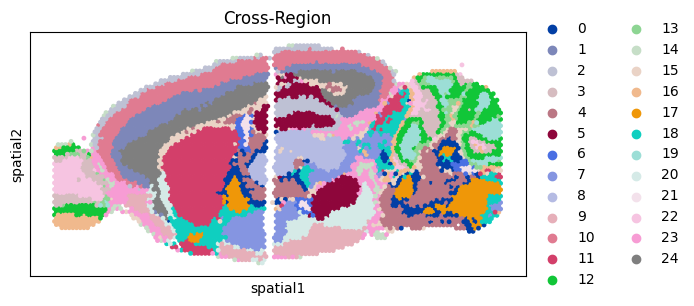

In [29]:
GCAST.plot_spatial(adata_processed, color="KMeans", title="Cross-Region",  save=False, show=True)

In [21]:
GCAST.eval_batch(adata, output_key="emb", label=False)

median ILISI:1.1770850844839218 


array([1.47750212, 1.78196233, 1.99541663, ..., 1.24804676, 1.00150285,
       1.95982183])